In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [15]:
import matplotlib.pyplot as plt
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [32]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [33]:
result_dir = '/content/mnt/MyDrive/results/CoffeeIndex'


In [34]:
df = pd.read_csv(f'{result_dir}/전국커피지수.csv')

In [35]:
df

,id,ed매장수,pk매장수,sb매장수,cb매장수,커피지수
0,가평,9,0.0,2.0,0.0,0.222222
1,강릉,15,2.0,5.0,0.0,0.294118
2,강진,1,0.0,0.0,0.0,0.000000
3,거제,9,0.0,6.0,0.0,0.666667
4,거창,1,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
235,홍천,3,1.0,2.0,0.0,0.500000
236,화성,28,10.0,16.0,5.0,0.552632
237,화순,1,1.0,0.0,0.0,0.000000
238,화천,1,1.0,0.0,0.0,0.000000


In [36]:
data_folder ='/content/mnt/MyDrive/data/인구소멸위기지역'
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')

In [37]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.columns = ['y', 'x', 'id']

In [38]:
!cp $data_folder/draw_map.py .config .
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

cp: -r not specified; omitting directory '.config'


In [39]:
coffee = pd.merge(df, map, how='right', on='id').fillna(0)
print(coffee.shape)
coffee.head()

(250, 8)


,id,ed매장수,pk매장수,sb매장수,cb매장수,커피지수,y,x
0,철원,2.0,0.0,0.0,0.0,0.000000,0,7
1,화천,1.0,1.0,0.0,0.0,0.000000,0,8
2,양구,1.0,0.0,0.0,0.0,0.000000,0,9
3,고성(강원),0.0,0.0,0.0,0.0,0.000000,0,10
4,양주,17.0,1.0,7.0,0.0,0.388889,1,3


In [40]:
coffee.isnull().sum()

id       0
ed매장수    0
pk매장수    0
sb매장수    0
cb매장수    0
커피지수     0
y        0
x        0
dtype: int64

In [41]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [42]:
coffee.rename(columns={'id':'ID'}, inplace=True)

## 커피지수

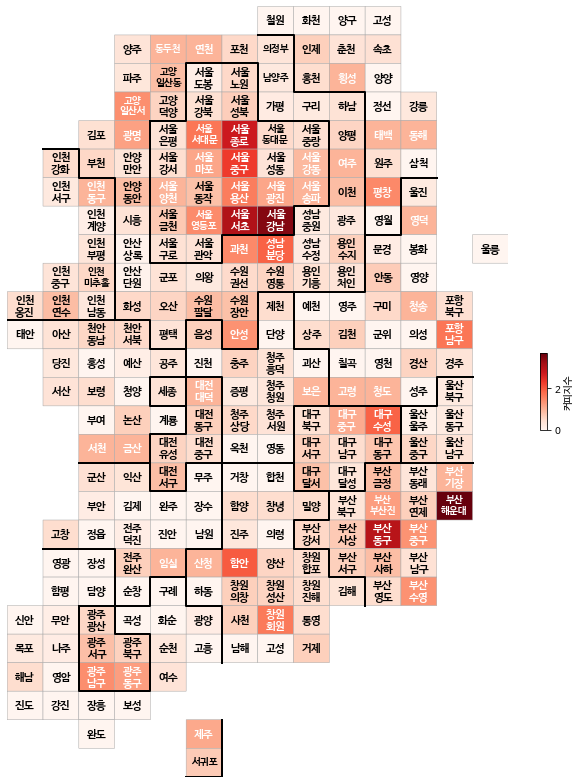

In [44]:
drawKorea('커피지수', coffee, 'Reds')

## 포리움

In [45]:
import json
import folium

In [46]:
coffee.set_index('ID', inplace=True)

In [47]:
geo_data = json.load(open(f'{data_folder}/skorea_municipalities_geo_simple.json'))

center = [35.9902, 127.054]

map = folium.Map(location=center, zoom_start=7)

folium.Choropleth(
    geo_data=geo_data,
    data=coffee.커피지수,
    columns=(coffee.index, coffee.커피지수),
    key_on='feature.id',
    fill_color='PuRd',
    legend_name='커피지수'
).add_to(map)
title = '<h3 align="center" style="font-size:20px">전국 커피지수</h3>'
map.get_root().html.add_child(folium.Element(title))     
map